In [10]:
import sys
sys.path.append('../../')
from mecode import G
from matplotlib import patches
import matplotlib.pyplot as plt

In [3]:
%matplotlib widget

(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 0.5)
(0, 0, 0, 

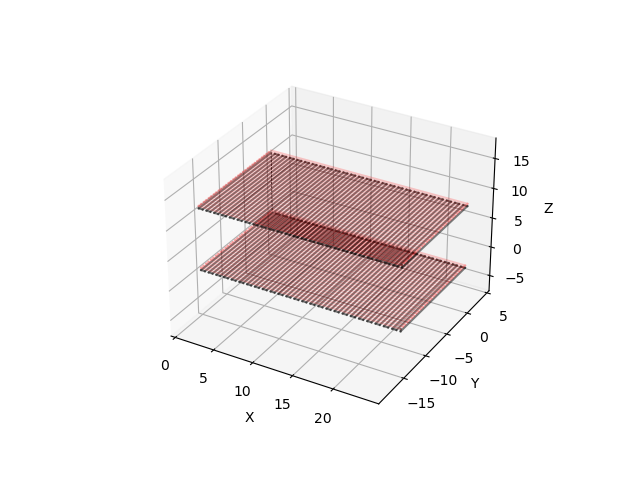

In [4]:
g = G(outfile='./.delete', print_lines=False)

COM_PORT = 5
PRESSURE = 60
SPEED = 1 # mm/s

D_F = 0.5 # mm - expected nozzle filament diameter
DZ = D_F*0.8 # mm -- expected filament height / layer spacing after sagging

LENGTH = 25 # mm
WIDTH = 30 * D_F # 15 mm
JOG_HEIGHT = 5 # mm

g.set_pressure(COM_PORT, PRESSURE)
g.feed(SPEED)

g.set_home(x=0, y=0, z=0)

'''build base'''
g.toggle_pressure(COM_PORT)   # ON
g.meander(x=LENGTH, y=WIDTH, spacing=D_F, start='UL', orientation='y')

g.move(z=DZ)
g.meander(x=LENGTH, y=WIDTH, spacing=D_F, start='LR', orientation='x', color=(1,0,0,0.2))
g.toggle_pressure(COM_PORT)   # OFF

g.move(z=+10)
g.toggle_pressure(COM_PORT)   # ON
g.meander(x=LENGTH, y=WIDTH, spacing=D_F, start='UL', orientation='y')

g.move(z=DZ)
g.meander(x=LENGTH, y=WIDTH, spacing=D_F, start='LR', orientation='x', color=(1,0,0,0.2))
g.toggle_pressure(COM_PORT)   # OFF

g.teardown()

g.view('matplotlib', color_on=True)
# g.view('vpython', fast_forward=30, color_on=True)


# Test Helix

G91
Call setPress P5 Q60
G1 F1
G92 X0.000000 Y0.000000 Z0.000000
Call togglePress P5
G16 X Y Z
G17
G2 X10.000000 Y10.000000 R20.000000 G1 Z5
Call togglePress P5
None


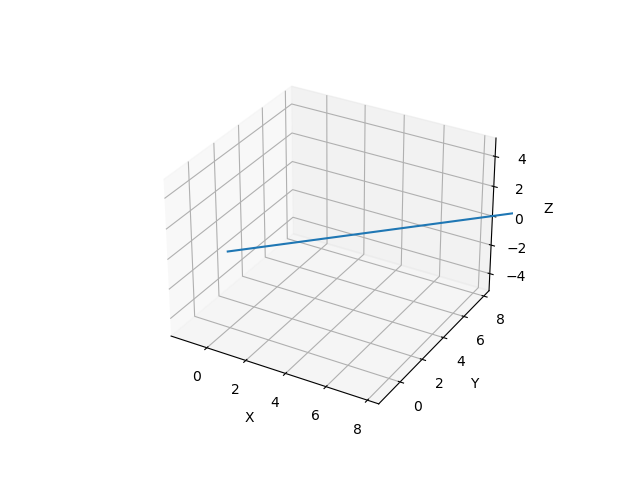

In [8]:
g = G(outfile='./.delete', print_lines=True)

COM_PORT = 5
PRESSURE = 60
SPEED = 1 # mm/s

D_F = 0.5 # mm - expected nozzle filament diameter
DZ = D_F*0.8 # mm -- expected filament height / layer spacing after sagging

LENGTH = 25 # mm
WIDTH = 30 * D_F # 15 mm
JOG_HEIGHT = 5 # mm

g.set_pressure(COM_PORT, PRESSURE)
g.feed(SPEED)

g.set_home(x=0, y=0, z=0)

'''build base'''
g.toggle_pressure(COM_PORT)   # ON
g.arc(x=10, y=10, radius=20, helix_dim='Z', helix_len=5, linearize=False)
g.toggle_pressure(COM_PORT)   # OFF

g.teardown()

g.view('matplotlib', color_on=True)
# g.view('vpython', fast_forward=30, color_on=True)


/var/folders/f3/nmdskxlj7673z62xr6_1_t8c0000gp/T/ipykernel_48052/793202965.py:4: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(patches.Arc((0,0), 10, 10, theta1=0, theta2=90, color='r', edgecolor='k'))


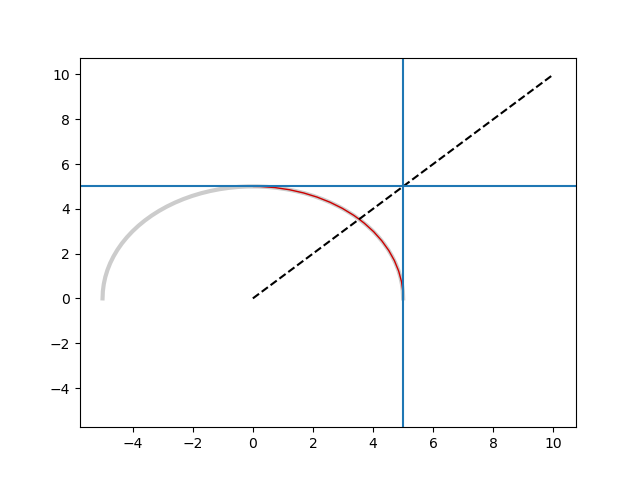

In [22]:

import numpy as np
fig, ax = plt.subplots(1,1)
ax.plot([0,10],[0,10], 'k--')
ax.add_patch(patches.Arc((0,0), 10, 10, theta1=0, theta2=90, color='r', edgecolor='k'))
t = np.linspace(0,np.pi)
x = 5*np.cos(t)
y = 5*np.sin(t)
plt.plot(x,y,'k',alpha=0.2, lw=3)
ax.axvline(5)
ax.axhline(5)
plt.show()